In [ ]:
# Import library

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
%matplotlib inline

In [212]:
# Read Data file

In [213]:
cp= pd.read_csv("E:\Linear regression R\Car_Price1.csv")

In [214]:
# Replace "?" value with NaN

In [215]:
cp=cp.replace("?",np.NaN)

In [216]:
cp.head()

,symboling,normalized_losses,CompName,Fueltype,Aaspiration,DoorNumber,CarBody,wheels,enginelocation,DriveWheel,...,engine-size,FuelSystem,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [217]:
cp.tail()

,symboling,normalized_losses,CompName,Fueltype,Aaspiration,DoorNumber,CarBody,wheels,enginelocation,DriveWheel,...,engine-size,FuelSystem,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [218]:
cp.dtypes

symboling              int64
normalized_losses     object
CompName              object
Fueltype              object
Aaspiration           object
DoorNumber            object
CarBody               object
wheels                object
enginelocation        object
DriveWheel           float64
length               float64
width                float64
height               float64
curb-weight            int64
EngineType            object
CylinderNumber        object
engine-size            int64
FuelSystem            object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peakrpm               object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [219]:
cp.shape

(205, 26)

# Checking for missing values

In [220]:
pd.isnull(cp).sum()

symboling             0
normalized_losses    41
CompName              0
Fueltype              0
Aaspiration           0
DoorNumber            2
CarBody               0
wheels                0
enginelocation        0
DriveWheel            0
length                0
width                 0
height                0
curb-weight           0
EngineType            0
CylinderNumber        0
engine-size           0
FuelSystem            0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peakrpm               2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [221]:
cp=cp.fillna(cp.median())

In [222]:
pd.isnull(cp).sum()

symboling            0
normalized_losses    0
CompName             0
Fueltype             0
Aaspiration          0
DoorNumber           2
CarBody              0
wheels               0
enginelocation       0
DriveWheel           0
length               0
width                0
height               0
curb-weight          0
EngineType           0
CylinderNumber       0
engine-size          0
FuelSystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peakrpm              0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [223]:
cp.dropna(inplace=True) 

In [224]:
# factorize columns of a pandas data frame
cp.CompName = cp.CompName.astype("category")
cp.Fueltype = cp.Fueltype.astype('category')
cp.Aaspiration = cp.Aaspiration.astype('category')
cp.DoorNumber = cp.DoorNumber.astype('category')
cp.CarBody = cp.CarBody.astype('category')
cp.wheels = cp.wheels.astype('category')
cp.enginelocation = cp.enginelocation.astype('category')
cp.EngineType = cp.EngineType.astype('category')
cp.CylinderNumber = cp.CylinderNumber.astype('category')
cp.FuelSystem = cp.FuelSystem.astype('category')
cp.normalized_losses = cp.normalized_losses.astype('float64')
cp.bore = cp.bore.astype('float64')
cp.stroke = cp.stroke.astype('float64')
cp.horsepower = cp.horsepower.astype('int64')
cp.stroke = cp.stroke.astype('float64')
cp.peakrpm = cp.peakrpm.astype('int64')
cp.price = cp.price.astype('int64')

In [225]:
pd.isnull(cp).sum()

symboling            0
normalized_losses    0
CompName             0
Fueltype             0
Aaspiration          0
DoorNumber           0
CarBody              0
wheels               0
enginelocation       0
DriveWheel           0
length               0
width                0
height               0
curb-weight          0
EngineType           0
CylinderNumber       0
engine-size          0
FuelSystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peakrpm              0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [226]:
cp.shape

(203, 26)

In [227]:
cp.dtypes

symboling               int64
normalized_losses     float64
CompName             category
Fueltype             category
Aaspiration          category
DoorNumber           category
CarBody              category
wheels               category
enginelocation       category
DriveWheel            float64
length                float64
width                 float64
height                float64
curb-weight             int64
EngineType           category
CylinderNumber       category
engine-size             int64
FuelSystem           category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peakrpm                 int64
city-mpg                int64
highway-mpg             int64
price                   int64
dtype: object

In [228]:
# Subsetting numeric and categorical variables for better analysis
catvars =['CompName','Fueltype','Aaspiration','DoorNumber','CarBody','wheels','enginelocation','EngineType','CylinderNumber','FuelSystem'] 
cols = list(cp.columns.values)
numvars = list()
for elements in cols:
    if elements not in catvars:
        numvars.append(elements)
numvars 

['symboling',
 'normalized_losses',
 'DriveWheel',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peakrpm',
 'city-mpg',
 'highway-mpg',
 'price']

# Summary Statistics

In [229]:
print (cp.describe())

        symboling  normalized_losses  DriveWheel     length       width  \
count  203.000000         203.000000  203.000000  203.00000  203.000000   
mean     0.837438         120.492611   98.781281  174.11330   65.915271   
std      1.250021          31.901359    6.040994   12.33909    2.150274   
min     -2.000000          65.000000   86.600000  141.10000   60.300000   
25%      0.000000         101.000000   94.500000  166.55000   64.100000   
50%      1.000000         115.000000   97.000000  173.20000   65.500000   
75%      2.000000         137.000000  102.400000  183.30000   66.900000   
max      3.000000         256.000000  120.900000  208.10000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  203.000000   203.000000   203.000000  203.000000  203.000000   
mean    53.731527  2557.916256   127.073892    3.330542    3.254778   
std      2.442526   522.557049    41.797123    0.271343    0.314898   
min     47.800000  1488.000000    61.000

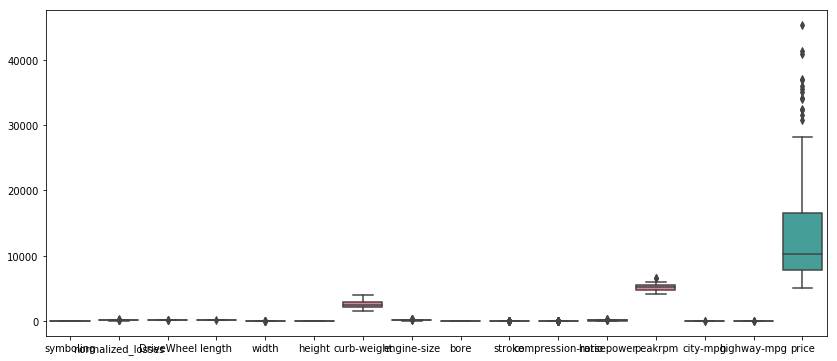

In [230]:
plt.figure(figsize=(14,6))
sns.boxplot(data=cp[numvars], palette=sns.color_palette("husl"))

# Corelation Matrix

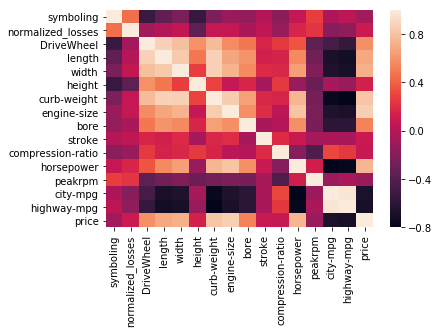

In [231]:
sns.heatmap(cp.corr())

In [232]:
# Price Distribution 

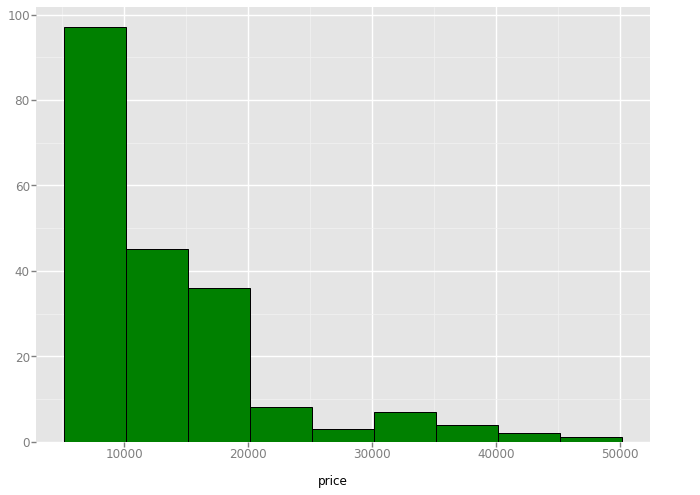

<ggplot: (112367314461)>

In [233]:
from ggplot import *
ggplot(cp, aes(x = 'price')) + geom_histogram(color='black',fill='green',binwidth=5000) 

# Price Vs Horsepower plot

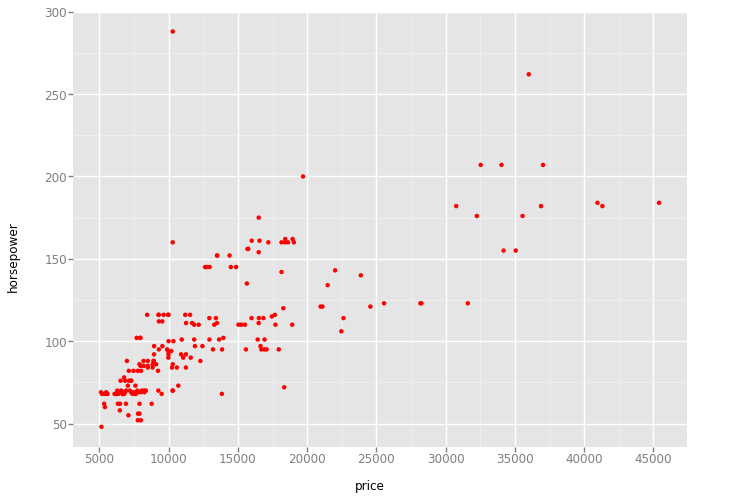

<ggplot: (112367365773)>

In [234]:
ggplot( aes(x = 'price', y = 'horsepower'), data = cp) + geom_point(color="red")

# Price Vs Mileage  

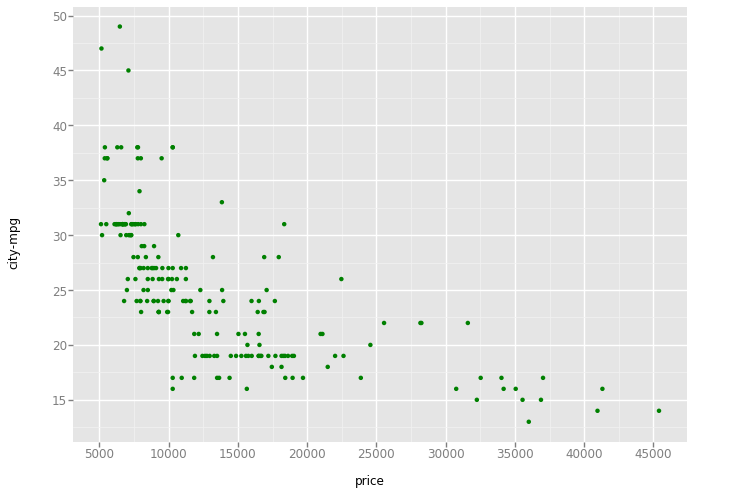

<ggplot: (112367253256)>

In [235]:
ggplot( aes(x = 'price', y = 'city-mpg'), data = cp) + geom_point(color="green")

# Price vs Highway mileage

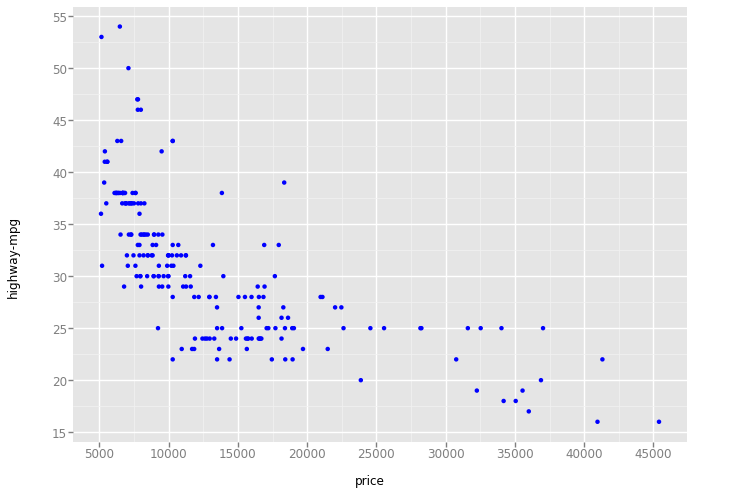

<ggplot: (-9223371924487392196)>

In [236]:
ggplot( aes(x = 'price', y = 'highway-mpg'), data = cp) + geom_point(color="blue")

# plot mean price vs CylinderNumber

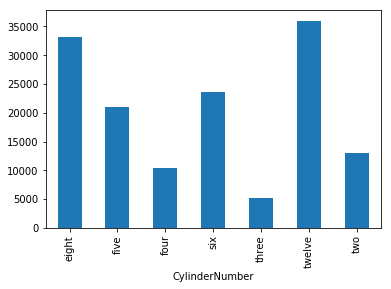

In [237]:
cp.groupby('CylinderNumber')['price'].mean().plot(kind='bar')


# Car body type vs mean price

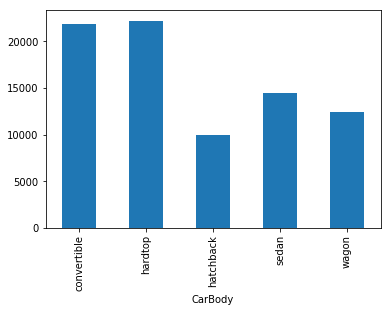

In [238]:
cp.groupby('CarBody')['price'].mean().plot(kind='bar')

# Car make vs mean price

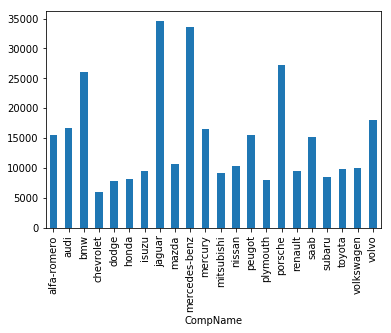

In [239]:
cp.groupby('CompName')['price'].mean().plot(kind='bar')

# Aspiration vs mean price

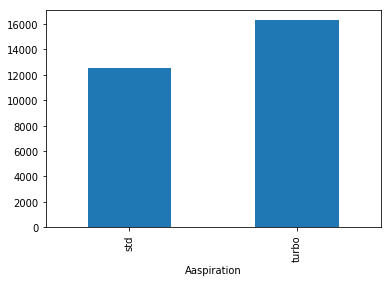

In [240]:
cp.groupby('Aaspiration')['price'].mean().plot(kind='bar')

# convert categorical columns into one-hot encoding

In [241]:
cp = pd.get_dummies(cp)

# Train test split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(cp.iloc[:,cp.columns!='price'], cp['price'], test_size=0.3, random_state=2)

In [243]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 75), (61, 75), (142,), (61,))

# model Building

In [253]:
clf = Ridge(alpha = 1.0,max_iter=20,normalize=True)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=20, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [254]:
#evaluate on development set
Y = clf.predict(X_test)

In [255]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sq_diff = np.square(y_test - Y)
error = np.sqrt(np.sum(sq_diff) / y_test.shape[0])
error

3717.6921986051248

In [256]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, Y)
coefficient_of_dermination

0.70169176037168746

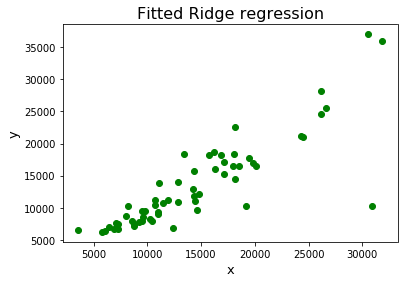

In [266]:
plt.scatter(Y, y_test,color='green')  
plt.title('Fitted Ridge regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)